# Libraries

In [1]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Dataset and Data Exploration

In [ ]:
library(readxl)
library(ggplot2)
library(dplyr)


In [3]:
sephora_df <- read_excel('sephora.xlsx')

In [4]:
head(sephora_df)

id,brand,category,name,rating,number_of_reviews,love,price,MarketingFlags,how_to_use
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2044816,Acqua Di Parma,Cologne,Colonia,4.5,76,2700,66,online only,0
1417567,Acqua Di Parma,Perfume,Arancia di Capri,4.5,26,2600,180,online only,0
1417617,Acqua Di Parma,Perfume,Mirto di Panarea,4.5,23,2900,120,online only,0
1417609,Acqua Di Parma,Perfume,Fico di Amalfi,4.5,79,2600,180,online only,0
1638832,Acqua Di Parma,Perfume,Rosa Nobile,4.5,79,5000,210,online only,0
1284462,Acqua Di Parma,Cologne,Colonia Essenza,5.0,13,719,120,online only,0


In [5]:
# Display the structure of the dataset
str(sephora_df)

tibble [8,616 × 10] (S3: tbl_df/tbl/data.frame)
 $ id               : num [1:8616] 2044816 1417567 1417617 1417609 1638832 ...
 $ brand            : chr [1:8616] "Acqua Di Parma" "Acqua Di Parma" "Acqua Di Parma" "Acqua Di Parma" ...
 $ category         : chr [1:8616] "Cologne" "Perfume" "Perfume" "Perfume" ...
 $ name             : chr [1:8616] "Colonia" "Arancia di Capri" "Mirto di Panarea" "Fico di Amalfi" ...
 $ rating           : num [1:8616] 4.5 4.5 4.5 4.5 4.5 5 4.5 4.5 4.5 4.5 ...
 $ number_of_reviews: num [1:8616] 76 26 23 79 79 13 16 19 44 6 ...
 $ love             : num [1:8616] 2700 2600 2900 2600 5000 719 1900 2300 2900 306 ...
 $ price            : num [1:8616] 66 180 120 180 210 120 120 142 120 120 ...
 $ MarketingFlags   : chr [1:8616] "online only" "online only" "online only" "online only" ...
 $ how_to_use       : num [1:8616] 0 0 0 0 0 0 0 0 0 0 ...


In [7]:
# Summary of the dataset
summary(sephora_df)

       id             brand             category             name          
 Min.   :   6528   Length:8616        Length:8616        Length:8616       
 1st Qu.:1802284   Class :character   Class :character   Class :character  
 Median :2059050   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1949372                                                           
 3rd Qu.:2216502                                                           
 Max.   :2358570                                                           
     rating      number_of_reviews      love             price       
 Min.   :1.000   Min.   :    1.0   Min.   :     20   Min.   :  2.00  
 1st Qu.:4.000   1st Qu.:   14.0   1st Qu.:   2000   1st Qu.: 25.00  
 Median :4.500   Median :   55.0   Median :   5400   Median : 35.00  
 Mean   :4.171   Mean   :  298.2   Mean   :  17288   Mean   : 50.28  
 3rd Qu.:4.500   3rd Qu.:  230.0   3rd Qu.:  14800   3rd Qu.: 59.00  
 Max.   :5.000   Max.   :19000.0   Max.   :13000

In [8]:
# Display the number of missing values for each feature
print(colSums(is.na(sephora_df)))

               id             brand          category              name 
                0                 0                 0                 0 
           rating number_of_reviews              love             price 
                0                 0                 0                 0 
   MarketingFlags        how_to_use 
             4624                 0 


In [10]:
cat_features_list <- c('MarketingFlags', 'how_to_use')  # Replace these with actual column names

# Display the unique values of each specified feature
print(lapply(sephora_df[, cat_features_list], unique))

$MarketingFlags
[1] "online only"     NA                "exclusive"       "limited edition"

$how_to_use
[1] 0 1



In [11]:
sephora_df$how_to_use <- factor(sephora_df$how_to_use)
sephora_df$MarketingFlags <- factor(sephora_df$MarketingFlags)

In [12]:
str(sephora_df)

tibble [8,616 × 10] (S3: tbl_df/tbl/data.frame)
 $ id               : num [1:8616] 2044816 1417567 1417617 1417609 1638832 ...
 $ brand            : chr [1:8616] "Acqua Di Parma" "Acqua Di Parma" "Acqua Di Parma" "Acqua Di Parma" ...
 $ category         : chr [1:8616] "Cologne" "Perfume" "Perfume" "Perfume" ...
 $ name             : chr [1:8616] "Colonia" "Arancia di Capri" "Mirto di Panarea" "Fico di Amalfi" ...
 $ rating           : num [1:8616] 4.5 4.5 4.5 4.5 4.5 5 4.5 4.5 4.5 4.5 ...
 $ number_of_reviews: num [1:8616] 76 26 23 79 79 13 16 19 44 6 ...
 $ love             : num [1:8616] 2700 2600 2900 2600 5000 719 1900 2300 2900 306 ...
 $ price            : num [1:8616] 66 180 120 180 210 120 120 142 120 120 ...
 $ MarketingFlags   : Factor w/ 3 levels "exclusive","limited edition",..: 3 3 3 3 3 3 NA 3 3 3 ...
 $ how_to_use       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


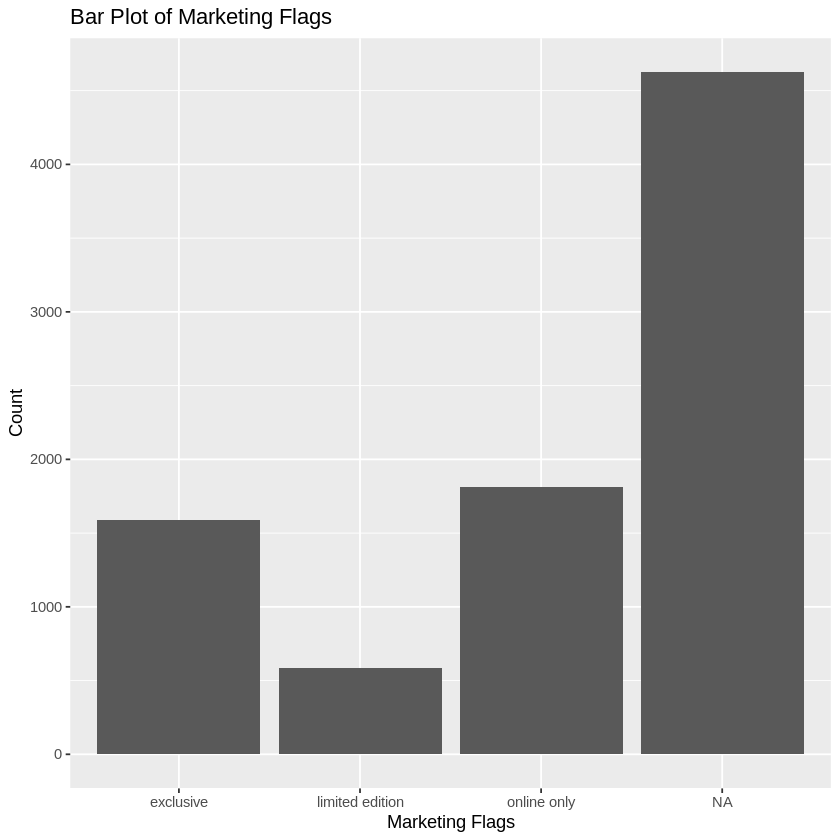

In [17]:
# Bar plot for Marketing Flags
ggplot(sephora_df, aes(x = MarketingFlags)) +
  geom_bar() +
  labs(title = "Bar Plot of Marketing Flags", x = "Marketing Flags", y = "Count")

In [19]:
print(table(sephora_df$MarketingFlags))


      exclusive limited edition     online only 
           1589             588            1815 


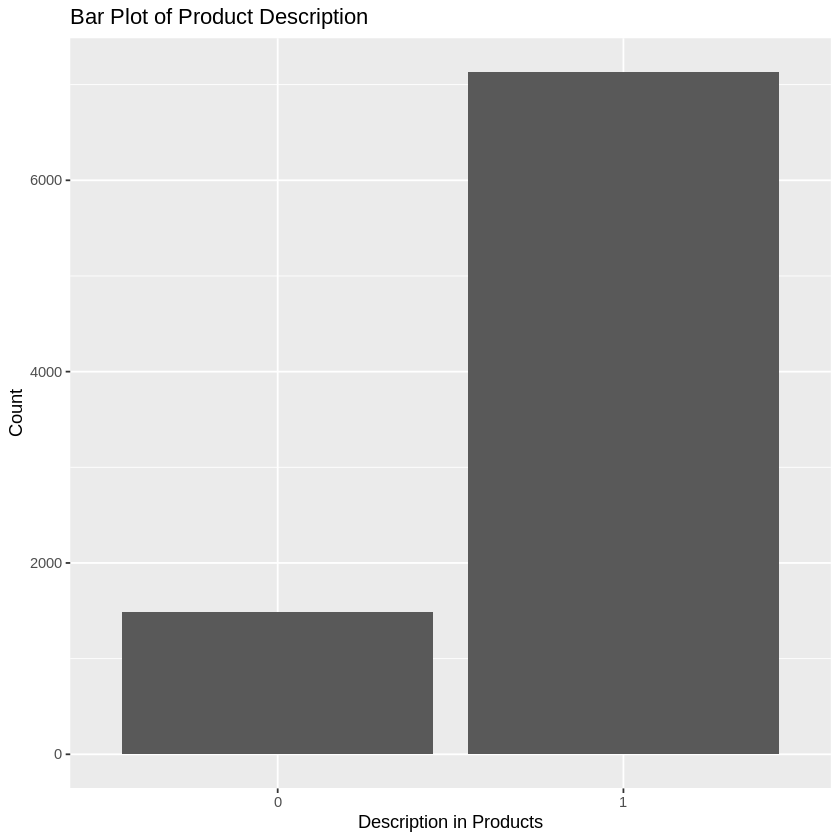

In [18]:
# Bar plot for Marketing Flags
ggplot(sephora_df, aes(x = how_to_use)) +
  geom_bar() +
  labs(title = "Bar Plot of Product Description", x = "Description in Products", y = "Count")

In [20]:
print(table(sephora_df$how_to_use))


   0    1 
1488 7128 


In [22]:
print(sephora_df %>%
  filter(how_to_use %in% c(0, 1)) %>%
  group_by(how_to_use, MarketingFlags) %>%
  summarise(count = n()))

`summarise()` has grouped output by 'how_to_use'. You can override using the
`.groups` argument.


# A tibble: 8 × 3
# Groups:   how_to_use [2]
  how_to_use MarketingFlags  count
  <fct>      <fct>           <int>
1 0          exclusive         187
2 0          limited edition   105
3 0          online only       347
4 0          NA                849
5 1          exclusive        1402
6 1          limited edition   483
7 1          online only      1468
8 1          NA               3775
